# Project Assignment

### 1. Load Dataset

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



pd.set_option('display.max_columns', None)

df = pd.read_csv("water_potability.csv")
df.head(50)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [115]:
#from google.colab import drive
#drive.mount('/content/drive')

### 2. Handle Missing Values

In [116]:
#check missing values in each every columns

print("Initial missing values:\n", df.isnull().sum().sort_values(ascending=False))

Initial missing values:
 Sulfate            781
ph                 491
Trihalomethanes    162
Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
dtype: int64


In [117]:
# Separate the data based on Potability
potable_data = df[df['Potability'] == 1]
non_potable_data = df[df['Potability'] == 0]

# Fill missing values with the median of each group
potable_data_filled = potable_data.fillna(potable_data.median(numeric_only=True))
non_potable_data_filled = non_potable_data.fillna(non_potable_data.median(numeric_only=True))

# Combine the data back
df_filled = pd.concat([potable_data_filled, non_potable_data_filled])

# Shuffle the dataframe to mix the rows of potable and non-potable samples back together
df_filled = df_filled.sample(frac=1, random_state=42).reset_index(drop=True)

# Check if there are any missing values left
missing_after_filling = df_filled.isnull().sum()
print("\nMissing Values After Filling:\n", missing_after_filling)


Missing Values After Filling:
 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [118]:
df_filled.head(50)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,5.720136,182.440160,13463.852419,8.253966,333.389426,401.509481,13.361778,52.952904,3.513255,0
1,6.649705,190.531947,16191.426091,5.254959,333.389426,564.203178,18.443031,42.815366,3.085179,0
2,10.252734,217.736669,9651.874826,4.338353,369.297709,528.121626,18.661403,54.150450,3.290372,0
3,7.036752,144.815264,14507.017808,5.819092,353.607275,290.889472,8.942072,67.587346,5.922582,1
4,7.912361,211.376444,34808.442780,8.913364,333.389426,594.899290,16.681990,72.048083,2.878516,0
5,9.663653,233.487268,13213.578254,10.149937,293.074657,326.777803,10.439619,62.455373,4.741944,1
6,8.064653,214.816681,27172.893573,6.369175,253.481228,490.280353,12.458830,65.399484,3.324113,1
7,5.329939,196.034623,24000.523144,5.729575,335.092322,511.705187,18.588091,68.458037,5.799322,0
8,8.016279,211.029304,14034.485799,9.797000,389.338796,491.079082,14.512991,35.565966,4.308223,1
9,7.035456,218.986406,9836.401847,7.064672,328.724289,386.345247,15.547964,57.328116,3.837257,0


### 1. Summary Statistics

In [119]:
df_filled.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074069,196.369496,22014.092526,7.122277,333.544928,426.205111,14.284970,66.405792,3.966786,0.390110
std,1.470043,32.879761,8768.570828,1.583085,36.146829,80.824064,3.308162,15.769943,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.035456,196.967627,20927.833607,7.130299,333.389426,421.884968,14.218338,66.542198,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


##**Question 1: What are the average chemical values in potable vs non-potable water samples?**

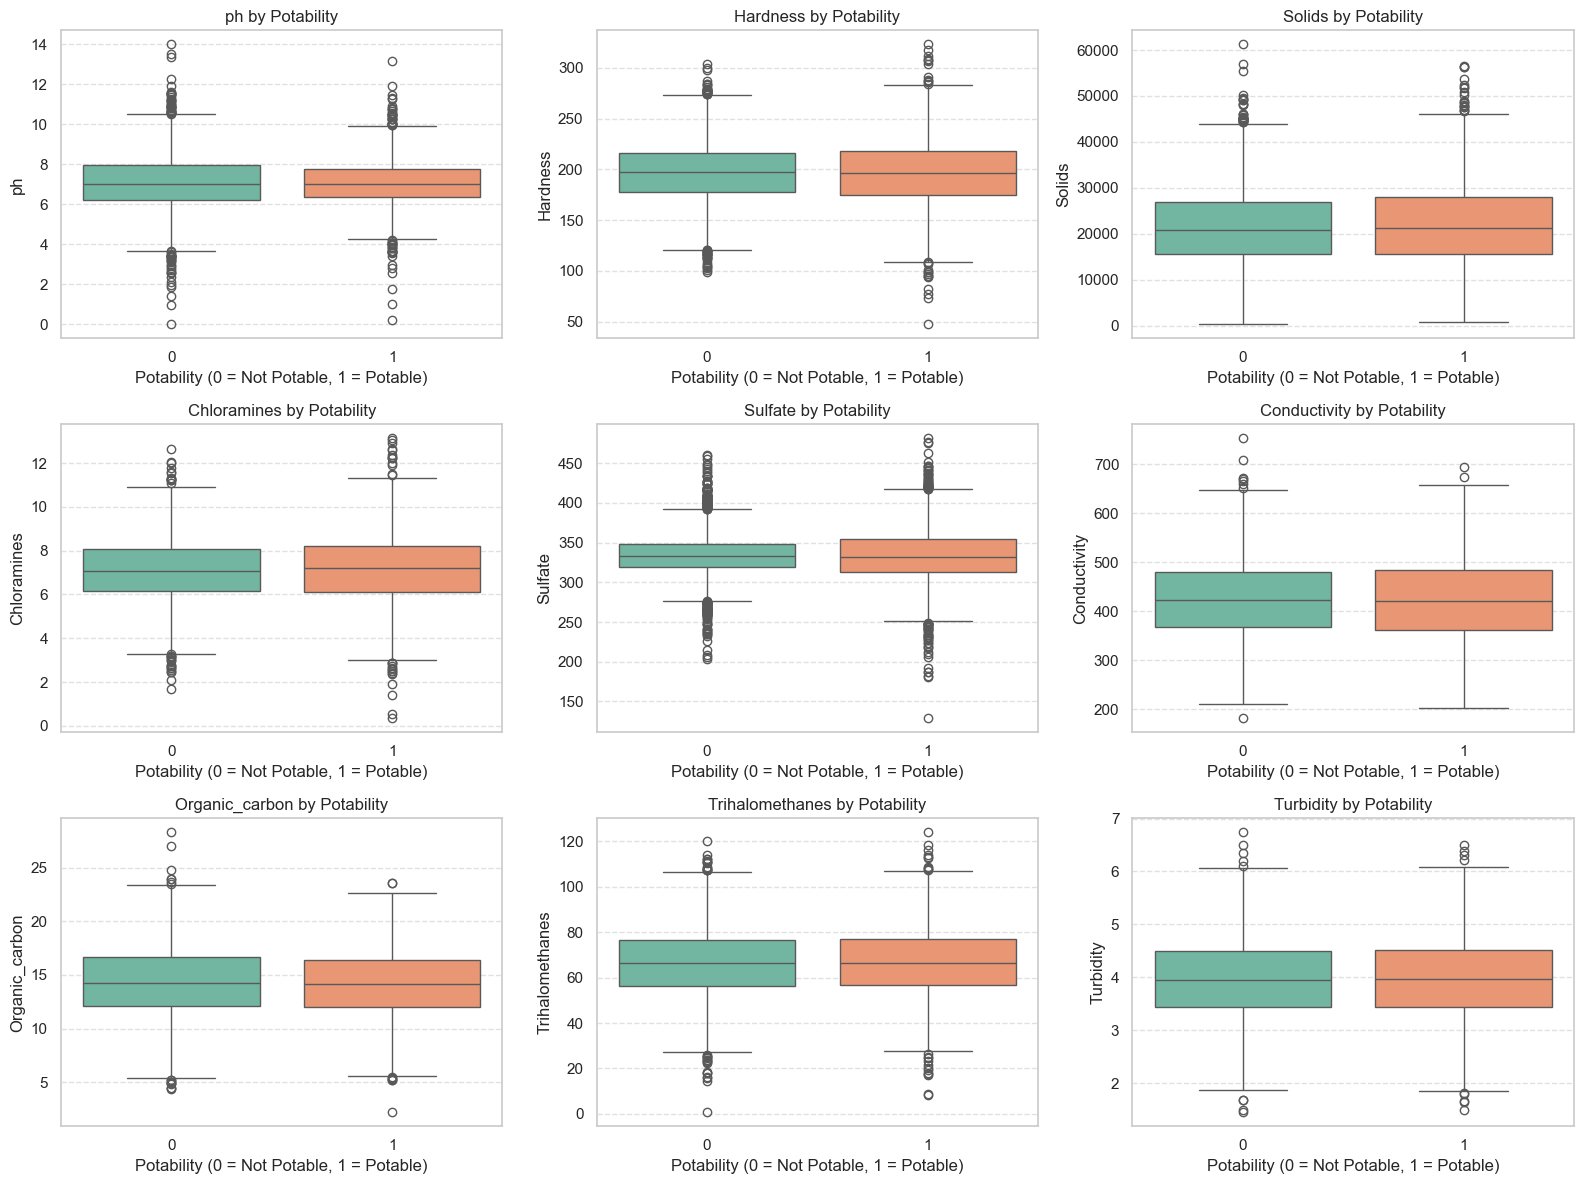

In [120]:
# Boxplot Visualization for Water Potability Data
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
            'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
# Plot boxplots for each chemical substance by potability
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Potability', y=feature, hue='Potability', data=df_filled, palette='Set2', legend=False)
    plt.title(f'{feature} by Potability')
    plt.xlabel('Potability (0 = Not Potable, 1 = Potable)')
    plt.ylabel(feature)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [121]:
#  Calculate Average Chemical Values for Potable vs Non-Potable Water
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
            'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Group by Potability and calculate the mean
mean_df = df_filled.groupby("Potability")[features].mean().T

# Rename columns for readability
mean_df.columns = ['non potable', 'potable']  # Potability: 0 = non potable, 1 = potable

# Reset index and rename for display
mean_df = mean_df.reset_index().rename(columns={'index': 'chemical substance'})

# Display result
print(mean_df)


  chemical substance   non potable       potable
0                 ph      7.077533      7.068655
1           Hardness    196.733292    195.800744
2             Solids  21777.490788  22383.991018
3        Chloramines      7.092175      7.169338
4            Sulfate    334.277336    332.399897
5       Conductivity    426.730454    425.383800
6     Organic_carbon     14.364335     14.160893
7    Trihalomethanes     66.316335     66.545646
8          Turbidity      3.965800      3.968328


##**Question 2: What are the safe ranges for each chemical property that most potable sample fall within?**


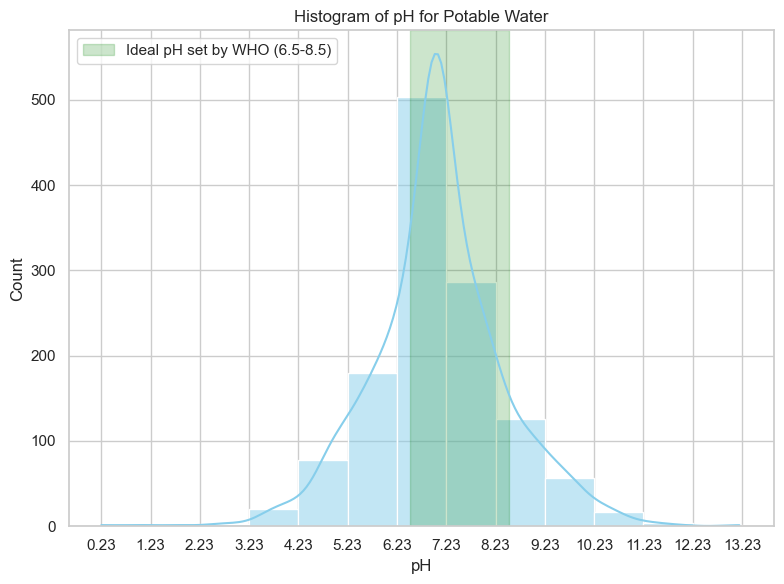

In [122]:
# Filter the dataset for potable water only
potable_df = df_filled[df_filled['Potability'] == 1]

# Histogram for pH with bin width of 1

bins = np.arange(min(potable_df['ph']), max(potable_df['ph']) + 1, 1)
plt.figure(figsize=(8,6))
sns.histplot(potable_df['ph'], kde=True, bins=bins, color='skyblue')
plt.axvspan(6.5,8.5, color='green', alpha=0.2, label='Ideal pH set by WHO (6.5-8.5)')
plt.title('Histogram of pH for Potable Water')
plt.xlabel('pH')
plt.ylabel('Count')
plt.xticks(bins, rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

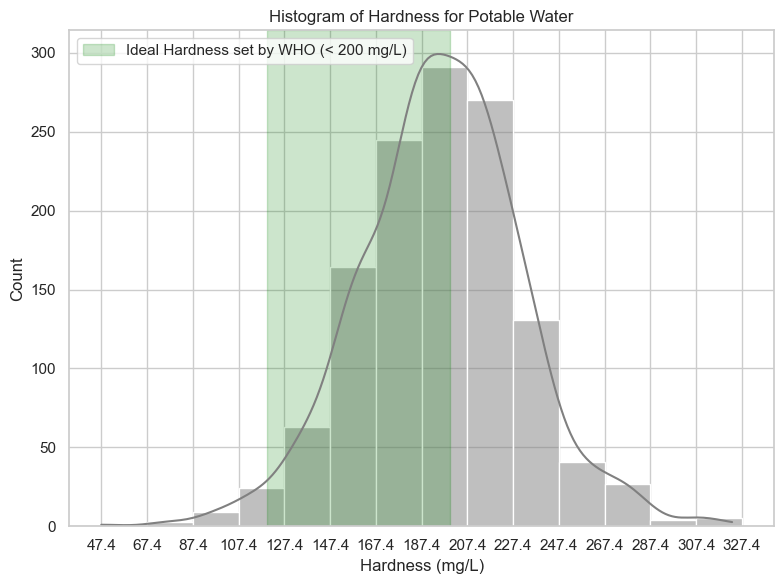

In [123]:
# Histogram for Hardness with bin width of 20

bins_hardness = np.arange(min(potable_df['Hardness']), max(potable_df['Hardness']) + 20, 20)
plt.figure(figsize=(8,6))
sns.histplot(potable_df['Hardness'], kde=True, bins=bins_hardness, color='grey')
plt.axvspan(120,200, color='green', alpha=0.2, label='Ideal Hardness set by WHO (< 200 mg/L)')
plt.title('Histogram of Hardness for Potable Water')
plt.xlabel('Hardness (mg/L)')
plt.ylabel('Count')
plt.xticks(bins_hardness, rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

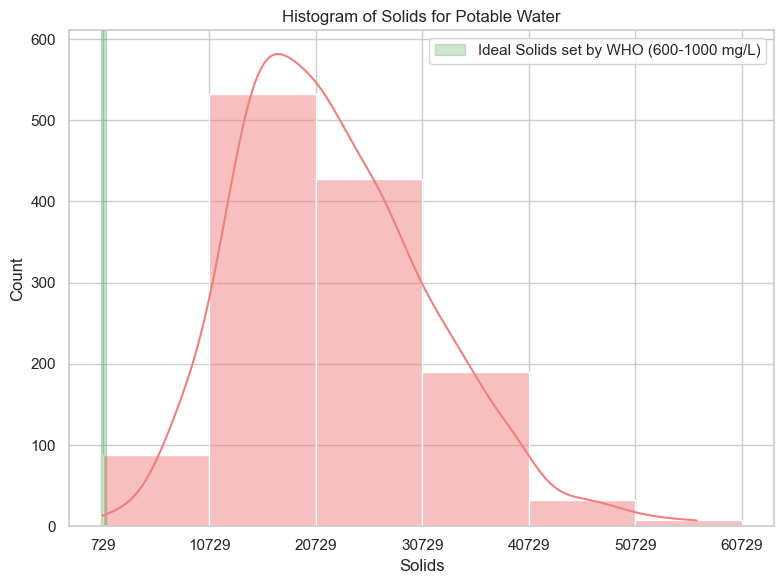

In [124]:
# Histogram for Solids with bin width of 10000

bins_solids = np.arange(min(potable_df['Solids']), max(potable_df['Solids']) + 10000, 10000)
plt.figure(figsize=(8,6))
sns.histplot(potable_df['Solids'], kde=True, bins=bins_solids, color='lightcoral')
plt.axvspan(600,1000, color='green', alpha=0.2, label='Ideal Solids set by WHO (600-1000 mg/L)')
plt.title('Histogram of Solids for Potable Water')
plt.xlabel('Solids')
plt.ylabel('Count')
plt.xticks(bins_solids, rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

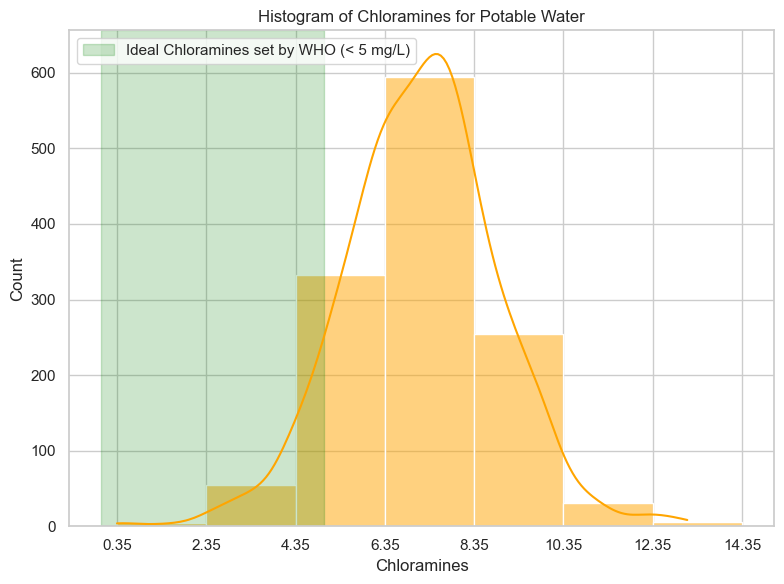

In [125]:
# Histogram for Chloramines with bin width of 2

bins_Chloramines = np.arange(min(potable_df['Chloramines']), max(potable_df['Chloramines']) + 2, 2)
plt.figure(figsize=(8,6))
sns.histplot(potable_df['Chloramines'], kde=True, bins=bins_Chloramines, color='orange')
plt.axvspan(0,5, color='green', alpha=0.2, label='Ideal Chloramines set by WHO (< 5 mg/L)')
plt.title('Histogram of Chloramines for Potable Water')
plt.xlabel('Chloramines')
plt.ylabel('Count')
plt.xticks(bins_Chloramines, rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

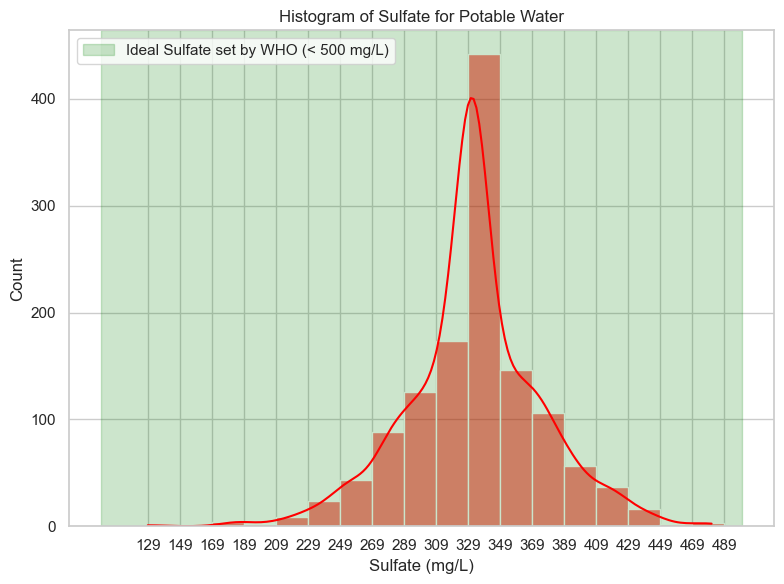

In [142]:
# Histogram for Sulfate with bin width of 20

bins_sulfate = np.arange(min(potable_df['Sulfate']), max(potable_df['Sulfate']) + 20, 20)
plt.figure(figsize=(8,6))
sns.histplot(potable_df['Sulfate'], kde=True, bins=bins_sulfate, color='red')
plt.axvspan(100,500, color='green', alpha=0.2, label='Ideal Sulfate set by WHO (< 500 mg/L)')
plt.title('Histogram of Sulfate for Potable Water')
plt.xlabel('Sulfate (mg/L)')
plt.ylabel('Count')
plt.xticks(bins_sulfate, rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

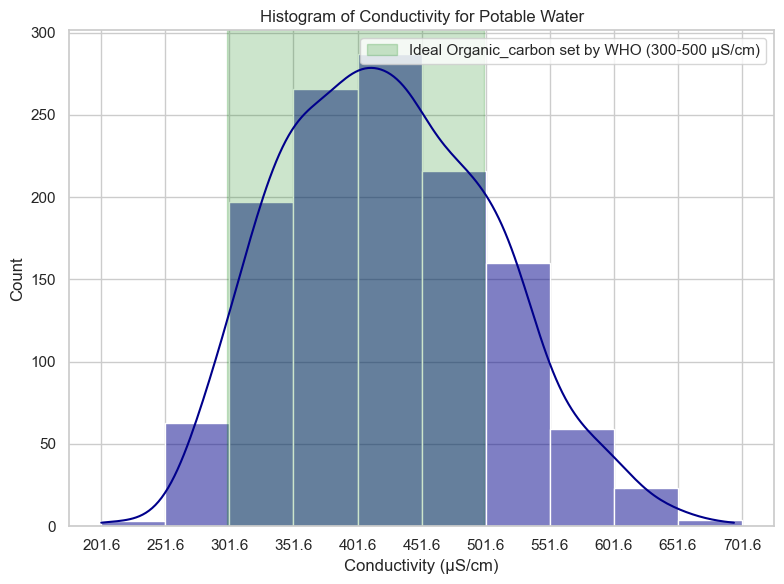

In [127]:
# Histogram for Conductivity with bin width of 50

bins_conductivity = np.arange(min(potable_df['Conductivity']), max(potable_df['Conductivity']) + 50, 50)
plt.figure(figsize=(8,6))
sns.histplot(potable_df['Conductivity'], kde=True, bins=bins_conductivity, color='darkblue')
plt.axvspan(300,500, color='green', alpha=0.2, label='Ideal Organic_carbon set by WHO (300-500 µS/cm)')
plt.title('Histogram of Conductivity for Potable Water')
plt.xlabel('Conductivity (µS/cm)')
plt.ylabel('Count')
plt.xticks(bins_conductivity, rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

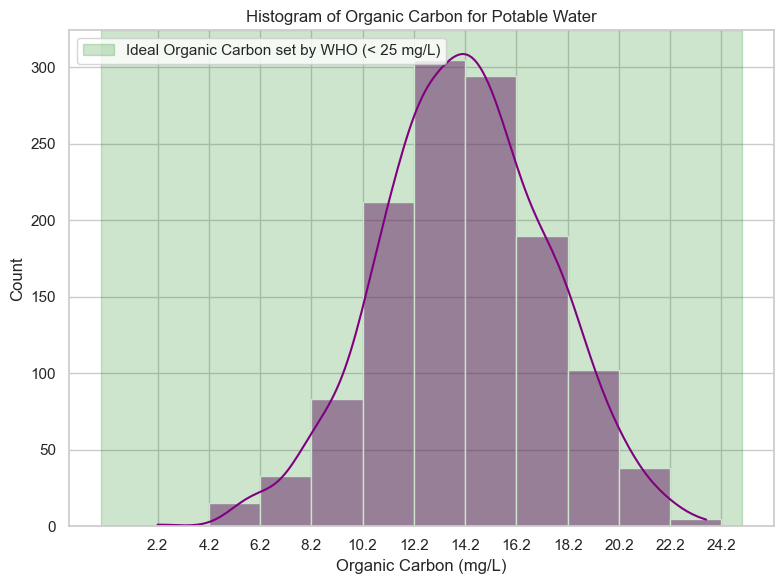

In [143]:
# Histogram for Organic Carbon with bin width of 2

bins_organic_carbon = np.arange(min(potable_df['Organic_carbon']), max(potable_df['Organic_carbon']) + 2, 2)
plt.figure(figsize=(8,6))
sns.histplot(potable_df['Organic_carbon'], kde=True, bins=bins_organic_carbon, color='purple')
plt.axvspan(0,25, color='green', alpha=0.2, label='Ideal Organic Carbon set by WHO (< 25 mg/L)')
plt.title('Histogram of Organic Carbon for Potable Water')
plt.xlabel('Organic Carbon (mg/L)')
plt.ylabel('Count')
plt.xticks(bins_organic_carbon, rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

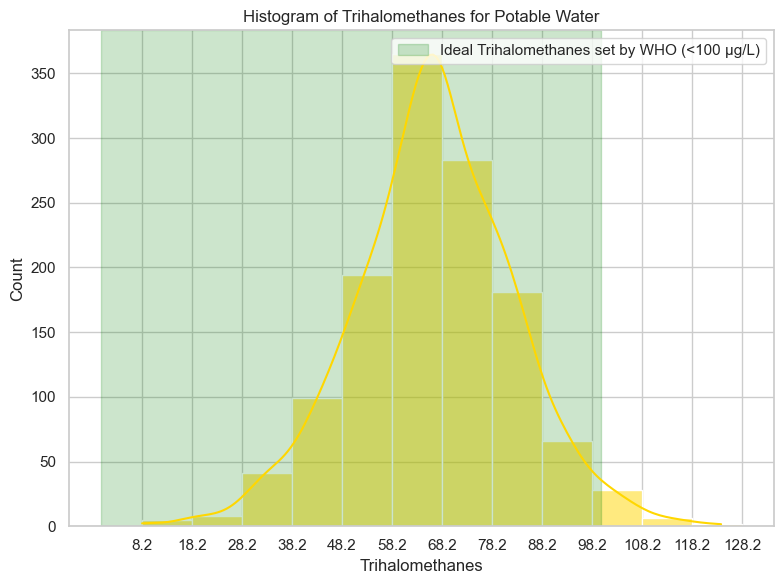

In [129]:
# Histogram for Trihalomethanes with bin width of 10

bins_trihalomethanes = np.arange(min(potable_df['Trihalomethanes']), max(potable_df['Trihalomethanes']) + 10, 10)
plt.figure(figsize=(8,6))
sns.histplot(potable_df['Trihalomethanes'], kde=True, bins=bins_trihalomethanes, color='gold')
plt.axvspan(0,100, color='green', alpha=0.2, label='Ideal Trihalomethanes set by WHO (<100 µg/L)')
plt.title('Histogram of Trihalomethanes for Potable Water')
plt.xlabel('Trihalomethanes')
plt.ylabel('Count')
plt.xticks(bins_trihalomethanes, rotation=0)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

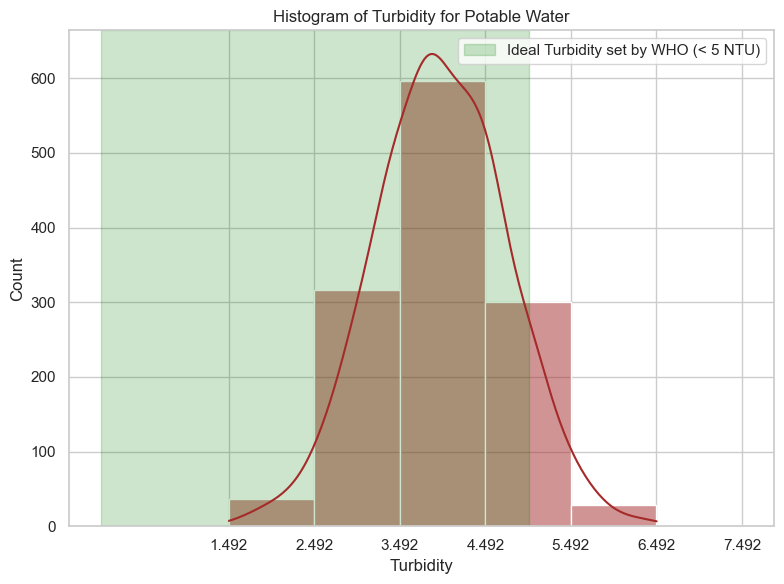

In [130]:
# Histogram for Turbidity with bin width of 1

bins_Turbidity = np.arange(min(potable_df['Turbidity']), max(potable_df['Turbidity']) + 1, 1)
plt.figure(figsize=(8,6))
sns.histplot(potable_df['Turbidity'], kde=True, bins=bins_Turbidity, color='brown')
plt.axvspan(0,5, color='green', alpha=0.2, label='Ideal Turbidity set by WHO (< 5 NTU)')
plt.title('Histogram of Turbidity for Potable Water')
plt.xlabel('Turbidity')
plt.ylabel('Count')
plt.xticks(bins_Turbidity, rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


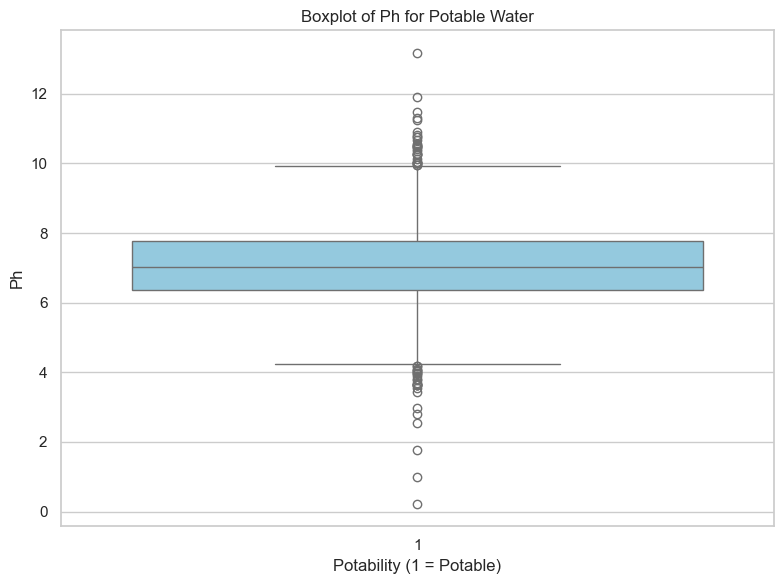

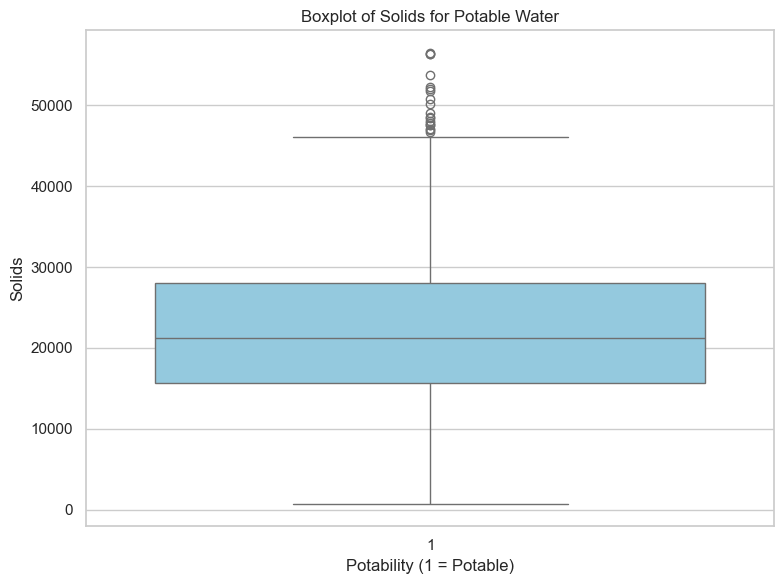

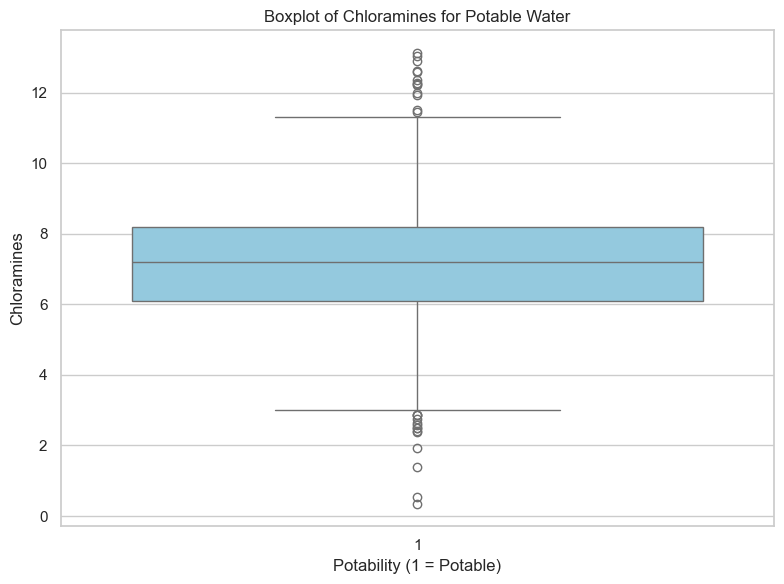

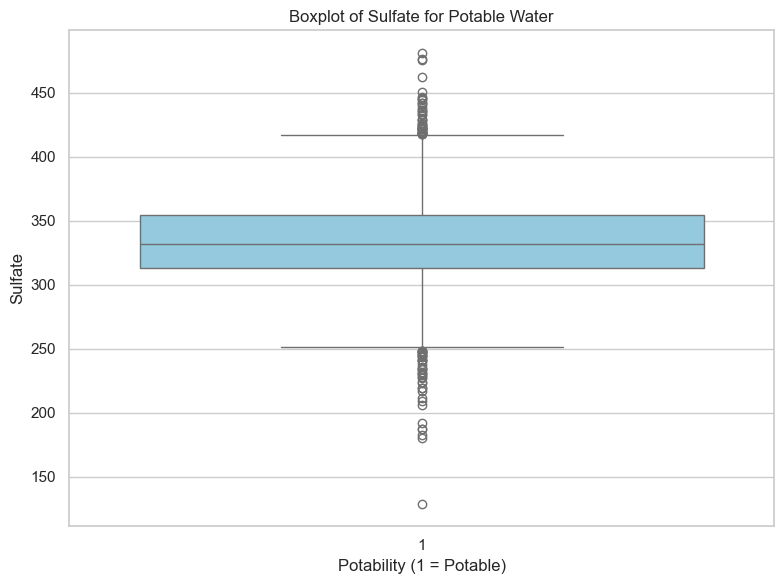

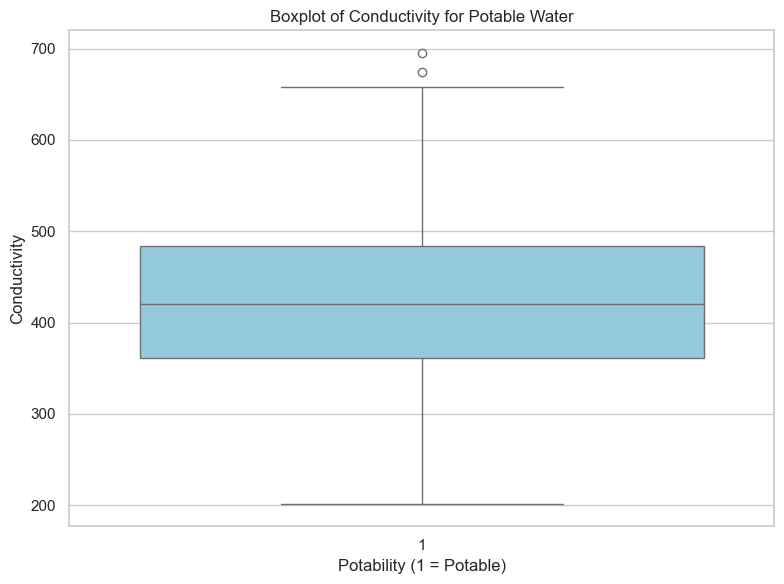

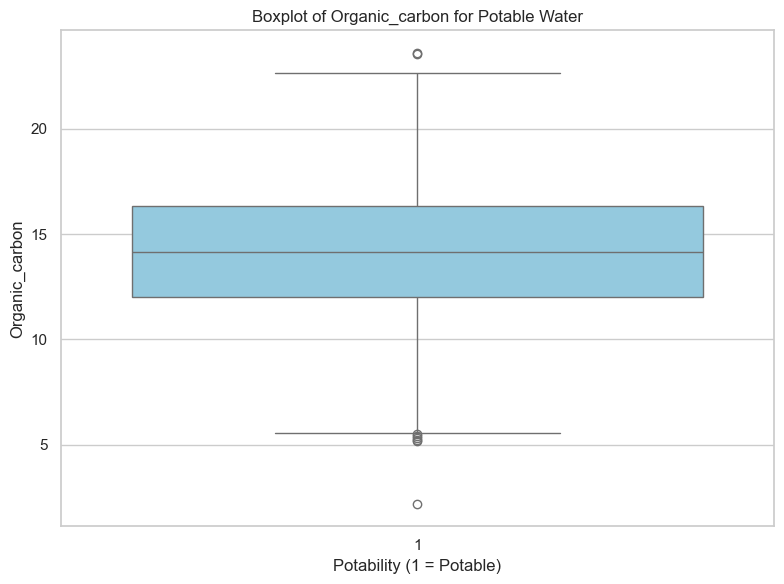

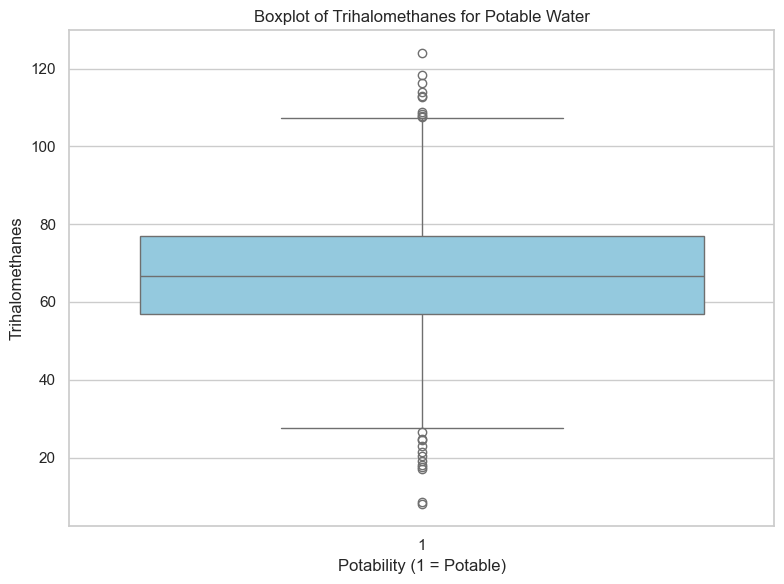

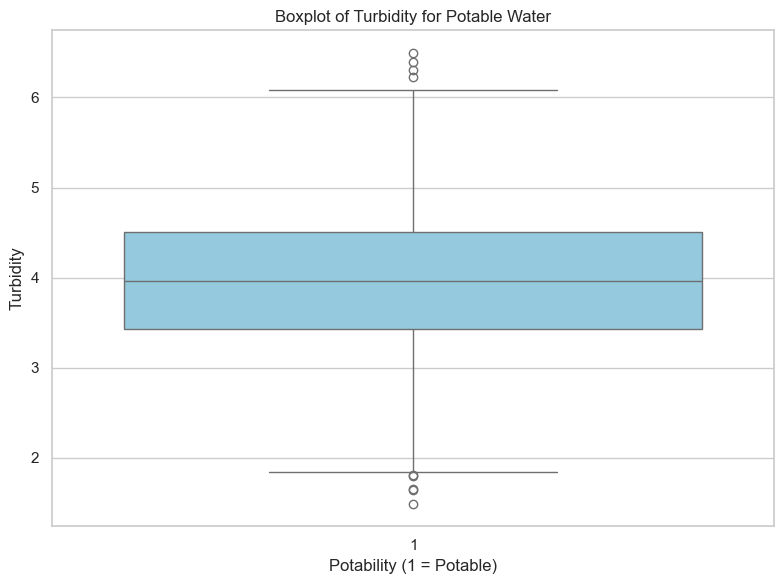

In [131]:
# List of substances to create box plots for
substances = ['ph', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Filter dataset for potable water only (Potability == 1)
potable_df = df_filled[df_filled['Potability'] == 1]

# Create a boxplot for each substance
for substance in substances:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Potability', y=substance, data=potable_df, color='skyblue')
    plt.title(f'Boxplot of {substance.capitalize()} for Potable Water')
    plt.xlabel('Potability (1 = Potable)')
    plt.ylabel(substance.capitalize())
    plt.tight_layout()
    plt.show()

## **Question 3: Correlation Between Conductivity & Solids**

**1. Visual Exploratory Analysis**

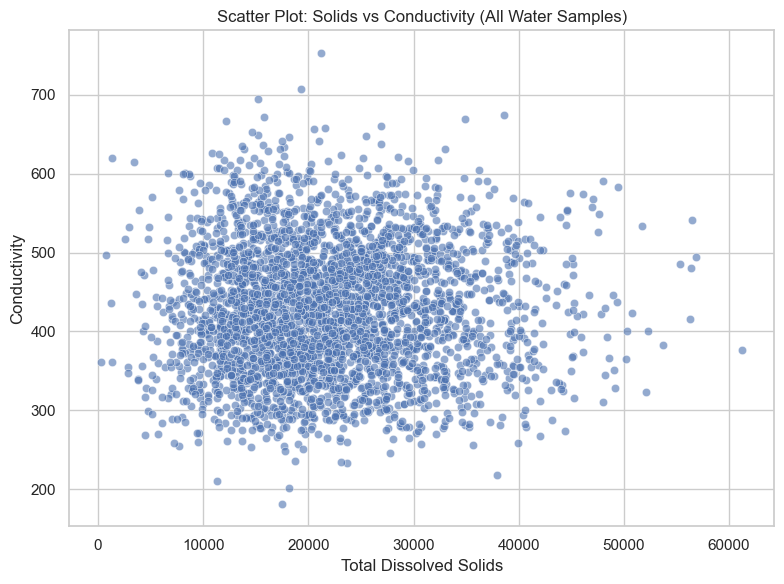

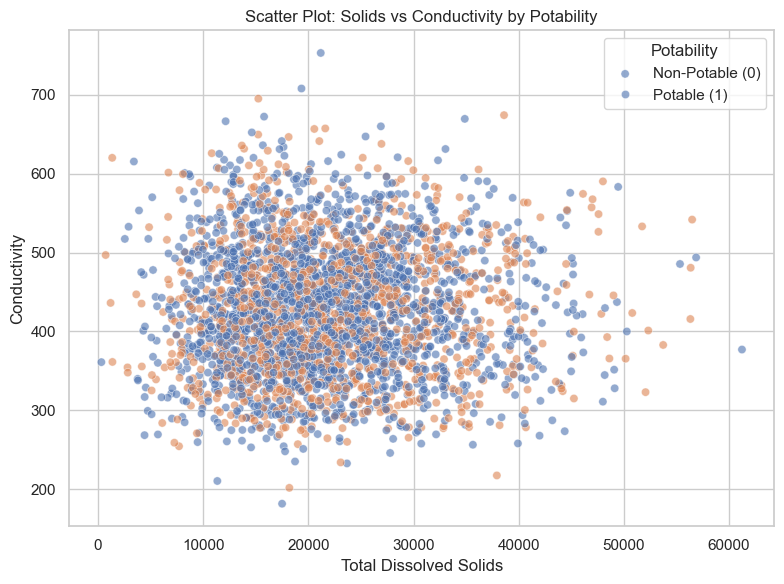

In [132]:
# Set plot style
sns.set(style="whitegrid")

# 1. Scatter Plot: Solids vs Conductivity (All Data)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filled, x='Solids', y='Conductivity', alpha=0.6)
plt.title('Scatter Plot: Solids vs Conductivity (All Water Samples)')
plt.xlabel('Total Dissolved Solids')
plt.ylabel('Conductivity')
plt.tight_layout()
plt.show()

# 2. Scatter Plot: Solids vs Conductivity by Potability
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filled, x='Solids', y='Conductivity', hue='Potability', alpha=0.6)
plt.title('Scatter Plot: Solids vs Conductivity by Potability')
plt.xlabel('Total Dissolved Solids')
plt.ylabel('Conductivity')
plt.legend(title='Potability', labels=['Non-Potable (0)', 'Potable (1)'])
plt.tight_layout()
plt.show()

**1.1 Plot 1: All Water Samples**

A positive linear relationship is visible where as Total Dissolved Solids (TDS) increase, Conductivity also increases.

This supports the basic chemical principle: more ions leads to higher conductivity.

**1.2 Plot 2: By Potability**

Both potable (blue) and non-potable (orange) samples show a similar positive trend.

The clusters overlap, but there are slightly different distributions:

- Non-potable samples span wider ranges of TDS and Conductivity.

- Potable samples cluster more toward moderate values.

**2. Statistical Analysis**

In [133]:
# Compute correlations
overall_corr = df[['Solids', 'Conductivity']].corr().iloc[0, 1]

# Subsets by potability
potable_df = df_filled[df_filled['Potability'] == 1]
non_potable_df = df_filled[df_filled['Potability'] == 0]

potable_corr = potable_df[['Solids', 'Conductivity']].corr().iloc[0, 1]
non_potable_corr = non_potable_df[['Solids', 'Conductivity']].corr().iloc[0, 1]

# Print results
print("\nCorrelation Results:")
print(f"Overall correlation (Solids vs Conductivity): {overall_corr:.4f}")
print(f"Potable water correlation: {potable_corr:.4f}")
print(f"Non-potable water correlation: {non_potable_corr:.4f}")


Correlation Results:
Overall correlation (Solids vs Conductivity): 0.0138
Potable water correlation: 0.0417
Non-potable water correlation: -0.0051


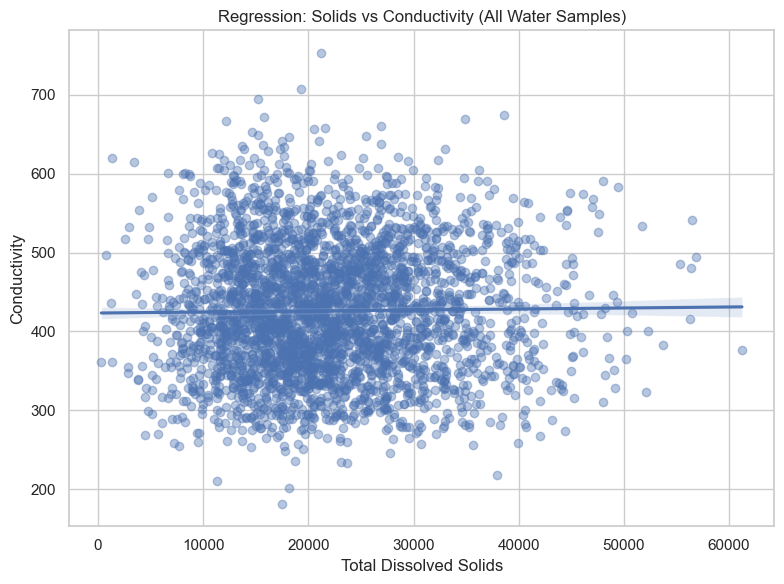

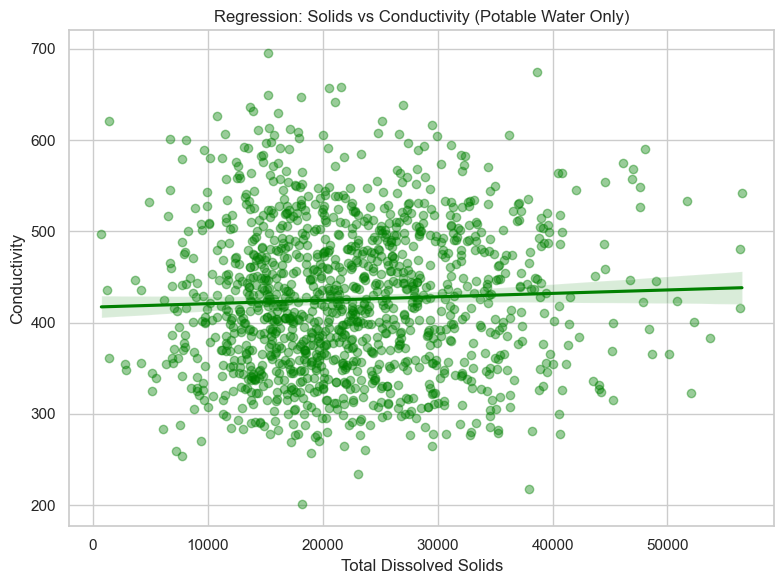

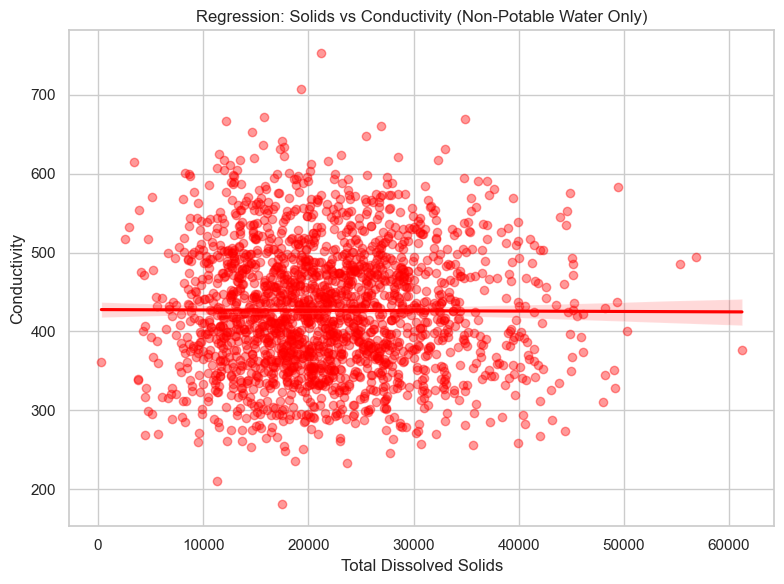

In [134]:
# Set style
sns.set(style="whitegrid")

# 1. Regression plot for ALL data
plt.figure(figsize=(8, 6))
sns.regplot(data=df_filled, x='Solids', y='Conductivity', scatter_kws={'alpha':0.4})
plt.title('Regression: Solids vs Conductivity (All Water Samples)')
plt.xlabel('Total Dissolved Solids')
plt.ylabel('Conductivity')
plt.tight_layout()
plt.show()

# 2. Regression plot for Potable Water
plt.figure(figsize=(8, 6))
sns.regplot(data=potable_df, x='Solids', y='Conductivity', color='green', scatter_kws={'alpha':0.4})
plt.title('Regression: Solids vs Conductivity (Potable Water Only)')
plt.xlabel('Total Dissolved Solids')
plt.ylabel('Conductivity')
plt.tight_layout()
plt.show()

# 3. Regression plot for Non-Potable Water
plt.figure(figsize=(8, 6))
sns.regplot(data=non_potable_df, x='Solids', y='Conductivity', color='red', scatter_kws={'alpha':0.4})
plt.title('Regression: Solids vs Conductivity (Non-Potable Water Only)')
plt.xlabel('Total Dissolved Solids')
plt.ylabel('Conductivity')
plt.tight_layout()
plt.show()

**2.1. All Water Samples**

The regression line appear almost horizontal (flat).

Interpretation: Across all water types, increasing Total Dissolved Solids (TDS) barely affects conductivity in a consistent, linear way.

**2.2 Potable Water Only**

The slope tilt slightly upwards, but it is still quite flat.

Interpretation: In potable water, there is a tiny tendency for higher TDS to increase conductivity, but it's too weak to be meaningful.

Possibly: Only some dissolved solids are ionic, or water treatment removes conductive ions.

**2.3 Non-Potable Water Only**

The regression line appear flat or slightly downward-sloping.

Interpretation: In non-potable water, conductivity does not increase reliably with solids. There might be even slightly decrease, but again, this is too weak to conclude anything strong.

**3. Insights and Interpretation**

**3.1 Overall Insights**

From both correlation and regression analysis, TDS and Conductivity are not strong predictors of potability in this dataset.

Although chemically related, in real-world water samples the relationship can be masked by complex composition, e.g.:

- Organic vs. inorganic solids

- Different types of salts, acids, or pollutants

- Interference from other variables (e.g., pH, temperature, sulfates)

**3.2 Conclusion for The Question**

Is there a strong correlation between conductivity and total dissolved solids, and how does this relationship affect water potability?

- No, there is not a strong correlation between TDS and conductivity in this dataset.

- This means we cannot rely on these two features alone to determine potability.

- Additional chemical indicators or feature combinations may be more informative.

## Question 4
 : Importance of each chemical features in water (Predective Modelling)

### 1. Split Model
using 70% and 30%, 3-fold cross validation  

In [135]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix)

X = df_filled.drop(columns=['Potability'])
y = df_filled['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 2. Initialize Predective Model (Random Forest)
Using Cross Validation Fold

In [136]:
rf = RandomForestClassifier(random_state=42)

In [137]:
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(rf, X, y, cv=3, scoring=scoring_metrics)

print("\nAccuracy scores:", cv_results['test_accuracy'])
print("Mean accuracy:", round(np.mean(cv_results['test_accuracy']), 4))

print("\nPrecision scores:", cv_results['test_precision'])
print("Mean precision:", round(np.mean(cv_results['test_precision']), 4))

print("\nRecall scores:", cv_results['test_recall'])
print("Mean recall:", round(np.mean(cv_results['test_recall']), 4))

print("\nF1 scores:", cv_results['test_f1'])
print("Mean F1 score:", round(np.mean(cv_results['test_f1']), 4))


Accuracy scores: [0.79304029 0.79212454 0.8021978 ]
Mean accuracy: 0.7958

Precision scores: [0.82679739 0.80615385 0.8       ]
Mean precision: 0.811

Recall scores: [0.59389671 0.61502347 0.657277  ]
Mean recall: 0.6221

F1 scores: [0.69125683 0.69773635 0.72164948]
Mean F1 score: 0.7035


### 3. Train Model

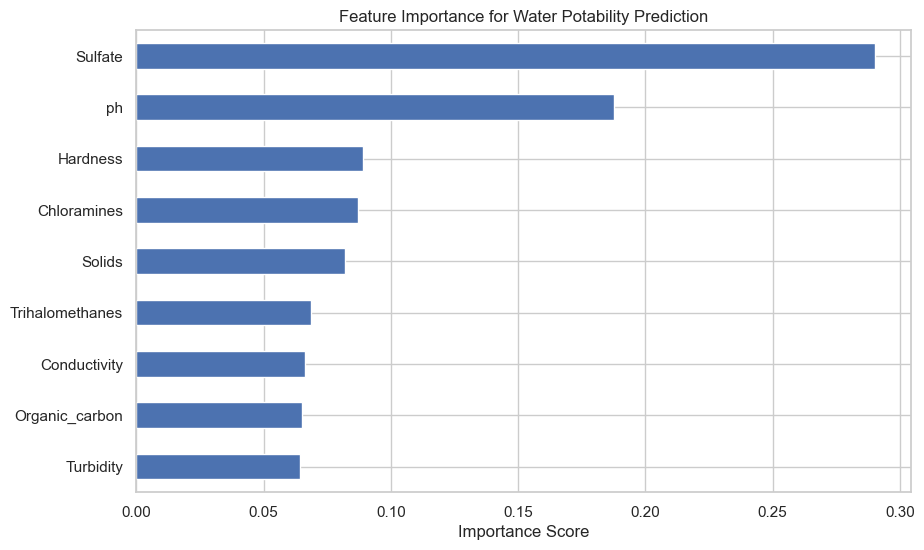

In [138]:
# Train model on full dataset
rf.fit(X, y)

# Get feature importances
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Plot
plt.figure(figsize=(10,6))
feat_importances.sort_values().plot(kind='barh')
plt.title("Feature Importance for Water Potability Prediction")
plt.xlabel("Importance Score")
plt.show()